<div style="display: flex; align-items: center; justify-content: space-between; margin-bottom: 15px;">
    <img src="https://www.freva.dkrz.de/static/img/dkrz-logo.png" style="height: 50px;">
    <div style="flex: 1;"></div>
    <img src="https://www.freva.dkrz.de/static/img/by_freva_transparent.png" style="height: 50px;">
</div>
<div style="text-align: center; margin-bottom: 20px;">
    <h1 style="font-size: 2.5em; margin: 0; font-weight: bold;">Freva - Data search and analysis framework for the Community</h1>
</div>
<div style="text-align: center;">
    <img src="https://freva-org.github.io/Talks/FrevaIntro/Logo.png" style="height: 350px;">
</div>


In [6]:
import os
import subprocess
import sys
import shutil

def cmd(sub_cmd: str, limit=None, list_limit=None) -> None:
    freva_bin = os.path.join(sys.exec_prefix, "bin", "freva-client")
    cmd = f"{freva_bin} {sub_cmd}"
    env = os.environ.copy()
    env["FREVA_NO_RICH_PANELS"] = "1"
    bash = shutil.which("bash")
    result = subprocess.run(cmd, capture_output=True, text=True, shell=True, executable=bash, env=env)
    if result.returncode != 0:
        print(f"[ERROR] Command failed:\n{result.stderr}")
        return
    output = result.stdout
    if list_limit:
        lines = output.splitlines()
        processed_lines = []
        for line in lines:
            if ':' in line and ',' in line:
                key, values = line.split(':', 1)
                items = values.split(',')[:list_limit]
                processed_lines.append(f"{key}: {', '.join(items).strip()}, ...")
            else:
                processed_lines.append(line)
        output = '\n'.join(processed_lines)
    if limit:
        for nn, line in enumerate(output.splitlines()):
            if nn >= limit:
                break
            print(line)
    else:
        print(output)

<div style="text-align: center; padding: 20px;">
    <h3>Common Problem: Finding and accesing Data</h3>
    <div style="display: grid; grid-template-columns: 1fr 2fr 1fr; gap: 30px; align-items: center; margin: 20px 0;">
        <div style="text-align: center;">
            <img src="./media/study-desperate.gif" alt="Frustrated researcher">
            <div style="text-align: left; font-style: italic; color: #666; font: 7x">
                <p>"I just need 2m-temperature data for my region..."</p>
            </div>
        </div>
        <div style="background: #2c3e50; color: white; padding: 20px; border-radius: 15px; position: relative;">
            <img src="https://www.freva.dkrz.de/static/img/dkrz-logo.png" style="height: 60px; filter: brightness(0) invert(1);" alt="DKRZ Logo">
            <div style="margin: 15px 0; font-size: 1.0em;">
                <div style="margin: 6px 0;"> /pool/data/ - 7 PB</div>
                <div style="margin: 6px 0;">5M+ - CMIP6 data</div>
                <div style="margin: 6px 0;"> CORDEX data which are constantly changing</div>
                <div style="margin: 6px 0;"> Thousands of variables</div>
                <div style="margin: 6px 0;">Multiple data formats</div>
                <div style="margin: 6px 0;"> you name ...</div>
            </div>
            <div style="position: absolute; top: -10px; right: -10px; background: #e74c3c; color: white; border-radius: 50%; width: 30px; height: 30px; display: flex; align-items: center; justify-content: center; font-size: 1.2em;">🔒</div>
        </div>
        <div style="text-align: center;">
            <img src="./media/scientist-mad-scientist.gif" alt="Mad scientist">
            <p style="font-size: 1.2em; color: #7f8c8d;">Sound familiar?<br> You're not alone! 🤝</p>
        </div>
    </div>
    <div style="background: #fff3cd; border: 1px solid #ffeaa7; padding: 15px; border-radius: 10px; margin-top: 15px;">
        <p style="font-size: 1.6em; color: #e74c3c; margin: 0;"><strong>Why should finding data be this hard?</strong></p>
    </div>
</div>

<div style="color: #2d3436; padding: 20px; position: relative; background: white;">
    <h2 style="text-align: center; color: #2d3436; margin-bottom: 20px;">Yet another solution: The Freva framework</h2>
    <div style="display: flex; align-items: flex-start; justify-content: space-between; margin: 20px 0; position: relative;">
        <!-- Researchers -->
        <div style="text-align: center; flex: 1;">
            <div style="font-size: 3em; margin-bottom: 10px;"><img src="./media/famous_scietist.png"></div>
            <h4 style="margin: 0; color: #2d3436;">Researchers</h4>
            <p style="margin: 5px 0 0 0; color: #636e72;">Need to search </p>
            <p style="margin: 5px 0 0 0; color: #636e72;">and access data</p>
        </div>
        <!-- Bridge -->
        <div style="flex: 2; text-align: center; position: relative;">
            <div style="position: relative; margin: -20px 0 10px 0;">
                <img src="./media/bridege_white_back.png" style="width: 100%; height: auto; max-width: 400px;">
            </div>
            <!-- Freva logo -->
            <div style="position: relative; margin: 10px auto; margin-top:0px; width: fit-content; z-index: 1;">
                <div style="background: linear-gradient(45deg, #ff7675, #fd79a8); padding: 20px; border-radius: 15px; box-shadow: 0 8px 32px rgba(0,0,0,0.1); transform: rotate(-5deg);">
                    <img src="https://www.freva.dkrz.de/static/img/by_freva_transparent.png" style="height: 60px; transform: rotate(5deg);">
                </div>
                <!-- Feature bubbles extending from the main body -->
                <div style="position: absolute; top: -15px; left: -25px; background: #00cec9; color: white; padding: 8px 12px; border-radius: 15px; font-size: 0.7em; font-weight: bold; transform: rotate(-20deg); box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
                    Central<br><span style="font-size: 0.6em; opacity: 0.9;">One stop shop</span>
                </div>
                <div style="position: absolute; top: -15px; right: -25px; background: #fd79a8; color: white; padding: 8px 12px; border-radius: 15px; font-size: 0.7em; font-weight: bold; transform: rotate(20deg); box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
                    Flexible<br><span style="font-size: 0.6em; opacity: 0.9;">Adapts to you</span>
                </div>
                <div style="position: absolute; bottom: -15px; left: -25px; background: #fdcb6e; color: white; padding: 8px 12px; border-radius: 15px; font-size: 0.7em; font-weight: bold; transform: rotate(15deg); box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
                    Intuitive<br><span style="font-size: 0.6em; opacity: 0.9;">Easy to use</span>
                </div>
                <div style="position: absolute; bottom: -15px; right: -25px; background: #a29bfe; color: white; padding: 8px 12px; border-radius: 15px; font-size: 0.7em; font-weight: bold; transform: rotate(-15deg); box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
                    Transparent<br><span style="font-size: 0.6em; opacity: 0.9;">Clear process</span>
                </div>
            </div>
        </div>
        <!-- DKRZ lgoo -->
        <div style="background: #2c3e50; color: white; padding: 20px; border-radius: 15px; position: relative; margin-top: 30px;">
            <img src="https://www.freva.dkrz.de/static/img/dkrz-logo.png" style="height: 60px; filter: brightness(0) invert(1);">
            <div style="margin-top: 10px; font-size: 0.9em;">DATA UNLOCKED!</div>
            <div style="position: absolute; top: -10px; right: -10px; background: #00b894; color: white; border-radius: 50%; width: 30px; height: 30px; display: flex; align-items: center; justify-content: center; font-size: 1.2em;">🔓</div>
        </div>
    </div>
    <div style="margin-top: 15px; background: #f8f9fa; padding: 15px; border-radius: 10px; text-align: center;">
        <h3 style="color: #2d3436; margin: 0 0 15px 0; display: inline-block;">Perfect for Every Research Task:</h3>
        <div style="display: inline-flex; gap: 40px; justify-content: center; margin-left: 20px;">
            <div>I) <strong>Search</strong></div>
            <div>II) <strong>Access</strong></div>
            <div>III) <strong>Analyze</strong></div>
        </div>
    </div>
</div>

<div style="text-align: center; padding: 25px;">
    <h2 style="color: #2d3436; margin-bottom: 25px; font-size: 1.6em;">Why Choose Freva?</h2>
    <!-- Timeline -->
    <div style="position: relative; margin: 35px 0; height: 110px;">
        <!-- Timeline line -->
        <div style="position: absolute; top: 32px; left: 10%; right: 10%; height: 3px; background: linear-gradient(to right, #00cec9, #fd79a8); border-radius: 2px;"></div>
        <!-- Birth -->
        <div style="position: absolute; left: 10%; top: 0; transform: translateX(-50%);">
            <div style="background: white; border: 3px solid #00cec9; border-radius: 50%; width: 65px; height: 65px; display: flex; align-items: center; justify-content: center; font-size: 1.6em; box-shadow: 0 3px 8px rgba(0,0,0,0.1);">🐣</div>
            <div style="margin-top: 8px; font-weight: bold; color: #00cec9; text-align: center; font-size: 0.9em;">2012</div>
            <div style="font-size: 0.7em; color: #636e72; text-align: center; line-height: 1.1;">Born for<br>Modellers</div>
        </div>
        <!-- Secure -->
        <div style="position: absolute; left: 35%; top: 0; transform: translateX(-50%);">
            <div style="background: white; border: 3px solid #fdcb6e; border-radius: 50%; width: 65px; height: 65px; display: flex; align-items: center; justify-content: center; font-size: 1.6em; box-shadow: 0 3px 8px rgba(0,0,0,0.1);">🔒</div>
            <div style="margin-top: 8px; font-weight: bold; color: #fdcb6e; text-align: center; font-size: 0.9em;">Secure</div>
            <div style="font-size: 0.7em; color: #636e72; text-align: center; line-height: 1.1;">Enterprise<br>Grade</div>
        </div>
        <!-- Plays Nice -->
        <div style="position: absolute; left: 65%; top: 0; transform: translateX(-50%);">
            <div style="background: white; border: 3px solid #a29bfe; border-radius: 50%; width: 65px; height: 65px; display: flex; align-items: center; justify-content: center; font-size: 1.6em; box-shadow: 0 3px 8px rgba(0,0,0,0.1);">🤝</div>
            <div style="margin-top: 8px; font-weight: bold; color: #a29bfe; text-align: center; font-size: 0.9em;">Plays Nice</div>
            <div style="font-size: 0.7em; color: #636e72; text-align: center; line-height: 1.1;">Works with<br>Other Tools</div>
        </div>
        <!-- Complete -->
        <div style="position: absolute; right: 10%; top: 0; transform: translateX(50%);">
            <div style="background: white; border: 3px solid #fd79a8; border-radius: 50%; width: 65px; height: 65px; display: flex; align-items: center; justify-content: center; font-size: 1.6em; box-shadow: 0 3px 8px rgba(0,0,0,0.1);">👑</div>
            <div style="margin-top: 8px; font-weight: bold; color: #fd79a8; text-align: center; font-size: 0.9em;">2025</div>
            <div style="font-size: 0.7em; color: #636e72; text-align: center; line-height: 1.1;">Most Complete<br>Metadata Store</div>
        </div>
    </div>
    <!-- Architecture -->
    <div style="margin-top: 20px; background: white; padding: 15px; border-radius: 12px; box-shadow: 0 4px 16px rgba(0,0,0,0.1);">
        <h3 style="color: #2d3436; margin-bottom: 12px; font-size: 1.1em;">Smart Architecture:</h3>
        <div style="display: flex; align-items: center; justify-content: space-between; gap: 80px; padding: 0 40px;">
            <!-- Client -->
            <div style="text-align: center;">
                <div style="color: #74b9ff; padding: 20px; border: 3px solid #74b9ff; border-radius: 15px; font-size: 1.5em; width: 140px; height: 140px; display: flex; align-items: center; justify-content: center; margin: 0 auto; background: transparent;">
                    <img src="./media/simple_client.png" style="width: 120px; height: 120px; object-fit: contain;">
                </div>
                <div style="margin-top: 10px; font-weight: bold; color: #74b9ff; font-size: 1em;">Simple Client</div>
                <div style="font-size: 0.8em; color: #636e72;">Easy for You</div>
            </div>
            <!-- REQUEST/RESPONSE Flow -->
            <div style="position: relative; display: flex; align-items: center; flex-direction: column; gap: 15px;">
                <!-- REQUEST -->
                <div style="display: flex; align-items: center; gap: 8px;">
                    <span style="font-size: 0.9em; color: #00cec9; font-weight: bold; letter-spacing: 1px;">REQUEST</span>
                    <div style="width: 80px; height: 3px; background: #00cec9; position: relative;">
                        <div style="position: absolute; right: -8px; top: -4px; width: 0; height: 0; border-left: 8px solid #00cec9; border-top: 5px solid transparent; border-bottom: 5px solid transparent;"></div>
                    </div>
                </div>
                <!-- RESPONSE -->
                <div style="display: flex; align-items: center; gap: 8px;">
                    <div style="width: 80px; height: 3px; background: #fd79a8; position: relative;">
                        <div style="position: absolute; left: -8px; top: -4px; width: 0; height: 0; border-right: 8px solid #fd79a8; border-top: 5px solid transparent; border-bottom: 5px solid transparent;"></div>
                    </div>
                    <span style="font-size: 0.9em; color: #fd79a8; font-weight: bold; letter-spacing: 1px;">RESPONSE</span>
                </div>
            </div>
            <style>
                @keyframes requestFlow {
                    0% { left: -30px; opacity: 0; }
                    20% { opacity: 1; }
                    80% { opacity: 1; }
                    100% { left: 90px; opacity: 0; }
                }
                @keyframes responseFlow {
                    0% { right: -30px; opacity: 0; }
                    20% { opacity: 1; }
                    80% { opacity: 1; }
                    100% { right: 90px; opacity: 0; }
                }
            </style>
            <!-- Server -->
            <div style="text-align: center;">
                <div style="color: #fd79a8; padding: 20px; border: 3px solid #fd79a8; border-radius: 15px; font-size: 1.5em; width: 140px; height: 140px; display: flex; align-items: center; justify-content: center; margin: 0 auto; background: transparent;">
                    <img src="./media/smart_server.png" style="width: 120px; height: 120px; object-fit: contain;">
                </div>
                <div style="margin-top: 10px; font-weight: bold; color: #fd79a8; font-size: 1em;">Powerful Server</div>
                <div style="font-size: 0.8em; color: #636e72;">Handles Complexity</div>
            </div>
        </div>
    </div>
</div>

<div style="padding: 40px; font-family: Arial, sans-serif; color: white; border-radius: 12px;">
    <h1 style="color: black; margin-bottom: 50px; font-size: 2.5em; font-weight: normal; text-align: left;">Excurse: How does it work?</h1>
    <div style="position: relative; width: 700px; height: 400px; margin: 0 auto;">
        <div style="position: absolute; left: 50px; top: 150px; width: 200px; height: 120px; background: #f1c40f; border-radius: 12px; display: flex; align-items: center; justify-content: center; box-shadow: 0 4px 12px rgba(0,0,0,0.3);">
            <div style="text-align: center; color: #2c3e50; font-weight: bold; font-size: 1.3em;">Freva Server</div>
        </div>
        <div style="position: absolute; right: 50px; top: 50px; width: 180px; height: 110px; background: #bdc3c7; border-radius: 12px; display: flex; flex-direction: column; align-items: center; justify-content: center; box-shadow: 0 4px 12px rgba(0,0,0,0.3); cursor: pointer;">
            <div style="color: #2c3e50; font-weight: bold; margin-bottom: 5px; font-size: 1.1em;">Client Lib:</div>
            <div style="color: #2c3e50; font-size: 0.8em;">freva-client</div>
            <div style="color: #7f8c8d; font-size: 0.8em; margin-top: 5px; text-decoration: underline; cursor: pointer;" onclick="window.open('https://anaconda.org/conda-forge/freva-client', '_blank')">conda-forge</div>
            <div style="color: #7f8c8d; font-size: 0.8em; margin-top: 5px; text-decoration: underline; cursor: pointer;" onclick="window.open('https://pypi.org/project/freva-client/', '_blank')">pypi</div>
        </div>
        <div style="position: absolute; right: 50px; bottom: 50px; width: 180px; height: 110px; background: #9b59b6; border-radius: 12px; display: flex; flex-direction: column; align-items: center; justify-content: center; box-shadow: 0 4px 12px rgba(0,0,0,0.3); cursor: pointer;" onclick="window.open('https://www.gems.dkrz.de/databrowser/', '_blank')">
            <div style="color: white; font-weight: bold; margin-bottom: 5px; font-size: 1.1em;">Web page:</div>
            <div style="color: white; font-size: 1em;">freva-web</div>
            <div style="color: #ecf0f1; font-size: 0.8em; margin-top: 5px; text-decoration: underline;"> Visit Site</div>
        </div>
        <svg style="position: absolute; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: 1;">
            <defs>
                <marker id="arrowhead" markerWidth="10" markerHeight="7" refX="9" refY="3.5" orient="auto">
                    <polygon points="0 0, 10 3.5, 0 7" fill="black" />
                </marker>
            </defs>
            <line x1="250" y1="190" x2="420" y2="130" stroke="black" stroke-width="3" marker-end="url(#arrowhead)" />
            <line x1="250" y1="230" x2="420" y2="300" stroke="black" stroke-width="3" marker-end="url(#arrowhead)" />
        </svg>
    </div>
</div>

<div style="padding: 30px; font-family: Arial, sans-serif;">
    <h2 style="color: #2c3e50; text-align: center; margin-bottom: 30px; font-size: 2em; font-weight: 300;">Freva Databrowser: Hands-on content table</h2>
    <div style="display: flex; justify-content: space-between; align-items: stretch; gap: 15px; max-width: 1400px; margin: 0 auto;">
        <div style="flex: 1; background: white; padding: 20px; border-radius: 12px; box-shadow: 0 3px 10px rgba(0,0,0,0.1); border-top: 5px solid #95a5a6; text-align: center;">
            <div style="background: #95a5a6; color: white; width: 50px; height: 50px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; margin: 0 auto 15px auto; font-size: 1.5em;">0</div>
            <h3 style="color: #2c3e50; margin: 0 0 10px 0; font-size: 1.2em;">Installation & Authentication</h3>
            <p style="color: #7f8c8d; margin: 0; font-size: 0.9em; line-height: 1.4;">Set up FREVA client and authenticate your access</p>
        </div>
        <div style="flex: 1; background: white; padding: 20px; border-radius: 12px; box-shadow: 0 3px 10px rgba(0,0,0,0.1); border-top: 5px solid #3498db; text-align: center;">
            <div style="background: #3498db; color: white; width: 50px; height: 50px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; margin: 0 auto 15px auto; font-size: 1.5em;">1</div>
            <h3 style="color: #2c3e50; margin: 0 0 10px 0; font-size: 1.2em;">Search
            <br>
            <span style="color: #3498db; font-weight: normal; font-size: 0.8em;">(Findablity)</span></h3>
            <p style="color: #7f8c8d; margin: 0; font-size: 0.9em; line-height: 1.4;">Find the datasets you need with smart search filters</p>
        </div>
        <div style="flex: 1; background: white; padding: 20px; border-radius: 12px; box-shadow: 0 3px 10px rgba(0,0,0,0.1); border-top: 5px solid #e74c3c; text-align: center;">
            <div style="background: #e74c3c; color: white; width: 50px; height: 50px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; margin: 0 auto 15px auto; font-size: 1.5em;">2</div>
            <h3 style="color: #2c3e50; margin: 0 0 10px 0; font-size: 1.2em;">Cataloging Data
            <br>
            <span style="color: #e74c3c; font-weight: normal; font-size: 0.8em;">(Reusablity)</span></h3>
            <p style="color: #7f8c8d; margin: 0; font-size: 0.9em; line-height: 1.4;">Browse, get and share datasets in structured catalogues</p>
        </div>
        <div style="flex: 1; background: white; padding: 20px; border-radius: 12px; box-shadow: 0 3px 10px rgba(0,0,0,0.1); border-top: 5px solid #f39c12; text-align: center;">
            <div style="background: #f39c12; color: white; width: 50px; height: 50px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; margin: 0 auto 15px auto; font-size: 1.5em;">3</div>
            <h3 style="color: #2c3e50; margin: 0 0 10px 0; font-size: 1.2em;">Access
            <br>
            <span style="color: #f39c12; font-weight: normal; font-size: 0.8em;">(Accessiblity)</span></h3>
            <p style="color: #7f8c8d; margin: 0; font-size: 0.9em; line-height: 1.4;">Retrieve and access the Freva data in your projects</p>
        </div>
        <div style="flex: 1; background: white; padding: 20px; border-radius: 12px; box-shadow: 0 3px 10px rgba(0,0,0,0.1); border-top: 5px solid #27ae60; text-align: center;">
            <div style="background: #27ae60; color: white; width: 50px; height: 50px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; margin: 0 auto 15px auto; font-size: 1.5em;">4</div>
            <h3 style="color: #2c3e50; margin: 0 0 10px 0; font-size: 1.2em;">Customize Dataset
            <br>
            <span style="color: #27ae60; font-weight: normal; font-size: 0.8em;">(Interoperablity)</span></h3>
            <p style="color: #7f8c8d; margin: 0; font-size: 0.9em; line-height: 1.4;">Add/Remove your customized data to/from Freva</p>
        </div>
    </div>
</div>

<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #95a5a6 0%, #7f8c8d 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #95a5a6; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">0</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Installation & Authentication</h1>
        </div>
    </div>
</div>

## The Client Library

| Environment | Installation Command |
|-------------|---------------------|
| DKRZ/Levante (Recommended) | $ `module load gems`(Terminal) <br> In [1]: `!module load gems`(Jupyterhub) |
| Conda (Local) | $ `conda create -n freva-client-env -c conda-forge freva-client -y` |
| Python (Local) | `$ python -m venv venv`<br> `$ source venv/bin/activate`<br> `$ pip install freva-client` |


<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #95a5a6 0%, #7f8c8d 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #95a5a6; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">0</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Installation & Authentication</h1>
        </div>
    </div>
</div>

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/bash/bash-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [7]:
!freva-client auth --version

freva-client: 2508.0.0


<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/python/python-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [8]:
from freva_client import auth, __version__
print(__version__)

2508.0.0


<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #95a5a6 0%, #7f8c8d 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #95a5a6; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">0</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Installation & Authentication</h1>
        </div>
    </div>
</div>

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/bash/bash-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [10]:
!echo "$ freva-client auth --host https://www.gems.dkrz.de"
!echo
!freva-client auth --force --host https://www.gems.dkrz.de 2> >(sed -u -n '1,1p' >&2)

$ freva-client auth --host https://www.gems.dkrz.de



[2025-08-03T13:09:04] INFO     freva-client: Opening browser for login:         


<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/python/python-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [11]:
from freva_client import authenticate, databrowser
token = authenticate(host="https://www.gems.dkrz.de")

<img src="https://cdnjs.cloudflare.com/ajax/libs/bootstrap-icons/1.13.1/icons/globe.svg" width="40" style="display: block; margin: 0; text-align: left;">

<video style="text-align: left; display: block;" width="400" height="200" controls>
  <source src="media/auth_demo_q.mp4" type="video/mp4">
</video>

<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #3498db 0%, #2980b9 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #3498db; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">1</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Search <span style="font-size: 0.6em; font-weight: normal;">(Findablity)</span></h1>
        </div>
    </div>
</div>

### MPI-GE (Grand Ensemble)

<img src="./media/mpi-ge.png" style="width: 600px; height: 450px;">

<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #3498db 0%, #2980b9 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #3498db; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">1</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Search <span style="font-size: 0.6em; font-weight: normal;">(Findablity)</span></h1>
        </div>
    </div>
</div>

### Metadata overview

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/bash/bash-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [ ]:
$ freva-client databrowser data-overview --host https://www.gems.dkrz.de

In [80]:
cmd("databrowser data-overview --host https://www.gems.dkrz.de")

Available search flavours:
- freva
- cmip6
- cmip5
- cordex
- nextgems
- user
Search attributes by flavour:
  cmip5:
  - experiment
  - member_id
  - fs_type
  - grid_label
  - institution_id
  - model_id
  - project
  - product
  - realm
  - variable
  - time
  - bbox
  - time_aggregation
  - time_frequency
  - cmor_table
  - dataset
  - format
  - grid_id
  - level_type
  cmip6:
  - experiment_id
  - member_id
  - fs_type
  - grid_label
  - institution_id
  - source_id
  - mip_era
  - activity_id
  - realm
  - variable_id
  - time
  - bbox
  - time_aggregation
  - frequency
  - table_id
  - dataset
  - format
  - grid_id
  - level_type
  cordex:
  - experiment
  - ensemble
  - fs_type
  - grid_label
  - institution
  - model
  - project
  - domain
  - realm
  - variable
  - time
  - bbox
  - time_aggregation
  - time_frequency
  - cmor_table
  - dataset
  - driving_model
  - format
  - grid_id
  - level_type
  - rcm_name
  - rcm_version
  freva:
  - project
  - product
  - institute


<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #3498db 0%, #2980b9 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #3498db; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">1</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Search <span style="font-size: 0.6em; font-weight: normal;">(Findablity)</span></h1>
        </div>
    </div>
</div>

### Metadata overview

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/python/python-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [78]:
databrowser.metadata_search(host="https://www.gems.dkrz.de").keys()

dict_keys(['ensemble', 'experiment', 'institute', 'model', 'product', 'project', 'realm', 'time_aggregation', 'time_frequency', 'variable'])

<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #3498db 0%, #2980b9 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #3498db; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">1</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Search <span style="font-size: 0.6em; font-weight: normal;">(Findablity)</span></h1>
        </div>
    </div>
</div>

### Search keys Investigation

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/bash/bash-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [ ]:
$ freva-client databrowser metadata-search --host https://www.gems.dkrz.de \
--facet mpi-ge --json | jq -rc '.project|join(", ")'

In [84]:
!freva-client databrowser metadata-search --host https://www.gems.dkrz.de --facet mpi-ge --json | jq -rc '.project|join(", ")'

mpi-ge


In [ ]:
$ freva-client databrowser metadata-search project=mpi-ge --json \
| jq -rc '.variable | index("tas") != null'

In [87]:
!freva-client databrowser metadata-search project=mpi-ge --json --host https://www.gems.dkrz.de | jq -rc '.variable | index("tas") != null'

true


<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #3498db 0%, #2980b9 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #3498db; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">1</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Search <span style="font-size: 0.6em; font-weight: normal;">(Findablity)</span></h1>
        </div>
    </div>
</div>

### Search keys Investigation

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/python/python-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [81]:
databrowser.metadata_search("mpi-ge", host="https://www.gems.dkrz.de")["project"]

['mpi-ge']

In [83]:
"tas" in databrowser.metadata_search("mpi-ge", host="https://www.gems.dkrz.de")["variable"]

True

<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #3498db 0%, #2980b9 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #3498db; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">1</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Search <span style="font-size: 0.6em; font-weight: normal;">(Findablity)</span></h1>
        </div>
    </div>
</div>

### Access Metadata

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/bash/bash-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [ ]:
$ freva-client databrowser metadata-search --host www.gems.dkrz.de --flavour cmip6 \
mip_era=mpi-ge variable_id=tas

In [92]:
cmd("databrowser metadata-search --host www.gems.dkrz.de --flavour cmip6 mip_era=mpi-ge variable_id=tas", limit=10, list_limit=3)


member_id: r001i1850p3,  r001i2005p3,  r002i1850p3, ...
experiment_id: 1pctco2,  historical,  picontrol, ...
institution_id: mpi-m
source_id: mpi-esm
activity_id: output1
mip_era: mpi-ge
realm: atmos,  land, ...
time_aggregation: mean
frequency: mon
variable_id: tas


<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #3498db 0%, #2980b9 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #3498db; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">1</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Search <span style="font-size: 0.6em; font-weight: normal;">(Findablity)</span></h1>
        </div>
    </div>
</div>

### Access Metadata

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/python/python-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [93]:
from freva_client import databrowser
db = databrowser(host="https://www.gems.dkrz.de",
                 flavour="cmip6",
                 mip_era="mpi-ge", variable_id="tas")
db

databrowser(flavour=cmip6, host=https://www.gems.dkrz.de/api/freva-nextgen/databrowser, multi_version=False, mip_era=mpi-ge, variable_id=tas)

<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #3498db 0%, #2980b9 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #3498db; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">1</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Search <span style="font-size: 0.6em; font-weight: normal;">(Findablity)</span></h1>
        </div>
    </div>
</div>

<img src="https://cdnjs.cloudflare.com/ajax/libs/bootstrap-icons/1.13.1/icons/globe.svg" width="40" style="display: block; margin: 0; text-align: left;">

<video style="text-align: left; display: block;" width="800" controls>
  <source src="media/mpi-mg_q.mp4" type="video/mp4">
</video>

<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #3498db 0%, #2980b9 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #3498db; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">1</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Search <span style="font-size: 0.6em; font-weight: normal;">(Findablity)</span></h1>
        </div>
    </div>
</div>

### Counting the number of datasets

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/bash/bash-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [ ]:
$ freva-client databrowser metadata-search  --host www.gems.dkrz.de \
--flavour cmip6 mip_era=mpi-ge variable_id=tas --json \
|  /run/current-system/sw/bin/jq -c .frequency

In [97]:
cmd("databrowser metadata-search  --host https://www.gems.dkrz.de --flavour cmip6 variable_id=tas mip_era=mpi-ge --json |  jq -c .frequency")

["mon"]



In [ ]:
$ freva-client databrowser data-count  --host www.gems.dkrz.de --flavour cmip6 \
mip_era=mpi-ge frequency=mon variable_id=pr variable_id=tas \
time='2025-01 to 2100-12'

In [100]:
cmd("databrowser data-count  --host www.gems.dkrz.de --flavour cmip6 mip_era=mpi-ge frequency=mon variable_id=tas time='2025-01 to 2100-12'")

602



<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #3498db 0%, #2980b9 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #3498db; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">1</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Search <span style="font-size: 0.6em; font-weight: normal;">(Findablity)</span></h1>
        </div>
    </div>
</div>

### Counting the number of datasets

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/python/python-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [103]:
db.metadata["frequency"]

['mon']

In [104]:
db_yr =  databrowser(
    host="https://www.gems.dkrz.de", 
    flavour="cmip6", 
    mip_era="mpi-ge", 
    frequency="mon", 
    variable_id="tas",
    time="2025-01 to 2100-12"
)
len(db_yr)

602

<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #3498db 0%, #2980b9 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #3498db; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">1</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Search <span style="font-size: 0.6em; font-weight: normal;">(Findablity)</span></h1>
        </div>
    </div>
</div>

### Accessing dataset path:

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/bash/bash-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [ ]:
$ freva-client databrowser metadata-search mip_era=mpi-ge variable_id=tas \
frequency=mon --time "2025-01 to 2100-12" --json \
--host  https://www.gems.dkrz.de --flavour cmip6 \
 | jq -c ".experiment_id"

In [115]:
cmd("databrowser metadata-search mip_era=mpi-ge variable_id=tas frequency=mon --time '2025-01 to 2100-12' --json --host  https://www.gems.dkrz.de --flavour cmip6 | jq -c '.experiment_id'")

["picontrol","rcp26","rcp45","rcp85"]



In [ ]:
$ freva-client databrowser data-count mip_era=mpi-ge variable_id=tas \
frequency=mon --time "2025-01 to 2100-12" --json experiment_id=picontrol \
--host  https://www.gems.dkrz.de --flavour cmip6

In [118]:
cmd("databrowser data-count mip_era=mpi-ge variable_id=tas frequency=mon experiment_id=picontrol --time '2025-01 to 2100-12' --json --host  https://www.gems.dkrz.de --flavour cmip6")

2



In [ ]:
$ freva-client databrowser data-search mip_era=mpi-ge variable_id=tas \
frequency=mon --time "2025-01 to 2100-12" --json experiment_id=picontrol \
--host  https://www.gems.dkrz.de --flavour cmip6

In [119]:
cmd("databrowser data-search mip_era=mpi-ge variable_id=tas frequency=mon experiment_id=picontrol --time '2025-01 to 2100-12' --json --host  https://www.gems.dkrz.de --flavour cmip6")

["/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM/piControl/mon/atmos/tas/r001i1850p3/v20190123/tas_Amon_MPI-ESM_piControl_r001i1850p3_200001-209912.nc", "/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM/piControl/mon/atmos/tas/r001i1850p3/v20190123/tas_Amon_MPI-ESM_piControl_r001i1850p3_210001-219912.nc"]



<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #3498db 0%, #2980b9 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #3498db; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">1</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Search <span style="font-size: 0.6em; font-weight: normal;">(Findablity)</span></h1>
        </div>
    </div>
</div>

### Accessing dataset path:

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/python/python-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [107]:
db_yr.metadata["experiment_id"]

['picontrol', 'rcp26', 'rcp45', 'rcp85']

In [109]:
pcontrol = databrowser(mip_era="mpi-ge",
                       variable_id="tas",
                       frequency="mon", time="2025-01 to 2100-12", experiment_id="picontrol",
                       host="https://www.gems.dkrz.de", flavour="cmip6")
len(pcontrol)

2

In [110]:
for num, file in enumerate(pcontrol):
    print(file)
    if num > 1:
        break

/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM/piControl/mon/atmos/tas/r001i1850p3/v20190123/tas_Amon_MPI-ESM_piControl_r001i1850p3_210001-219912.nc
/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM/piControl/mon/atmos/tas/r001i1850p3/v20190123/tas_Amon_MPI-ESM_piControl_r001i1850p3_200001-209912.nc


<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #3498db 0%, #2980b9 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #3498db; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">1</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Search <span style="font-size: 0.6em; font-weight: normal;">(Findablity)</span></h1>
        </div>
    </div>
</div>

### Pro Tip: Query data of files

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/bash/bash-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [111]:
print("$ freva-client databrowser metadata-search file=/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM/piControl/mon/atmos/tas/r001i1850p3/v20190123/tas_Amon_MPI-ESM_piControl_r001i1850p3_210001-219912.nc --host=www.gems.dkrz.de")
print()
cmd("databrowser metadata-search file=/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM/piControl/mon/atmos/tas/r001i1850p3/v20190123/tas_Amon_MPI-ESM_piControl_r001i1850p3_210001-219912.nc --host=www.gems.dkrz.de") 

$ freva-client databrowser metadata-search file=/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM/piControl/mon/atmos/tas/r001i1850p3/v20190123/tas_Amon_MPI-ESM_piControl_r001i1850p3_210001-219912.nc --host=www.gems.dkrz.de

ensemble: r001i1850p3
experiment: picontrol
institute: mpi-m
model: mpi-esm
product: output1
project: mpi-ge
realm: atmos
time_aggregation: mean
time_frequency: mon
variable: tas



<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #3498db 0%, #2980b9 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #3498db; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">1</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Search <span style="font-size: 0.6em; font-weight: normal;">(Findablity)</span></h1>
        </div>
    </div>
</div>

### Pro Tip: Query data of files

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/python/python-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [112]:
db.metadata_search(
    file="/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM/piControl/mon/atmos/tas/r001i1850p3/v20190123/tas_Amon_MPI-ESM_piControl_r001i1850p3_210001-219912.nc",
    host="www.gems.dkrz.de"
)

{'ensemble': ['r001i1850p3'],
 'experiment': ['picontrol'],
 'institute': ['mpi-m'],
 'model': ['mpi-esm'],
 'product': ['output1'],
 'project': ['mpi-ge'],
 'realm': ['atmos'],
 'time_aggregation': ['mean'],
 'time_frequency': ['mon'],
 'variable': ['tas']}

<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #3498db 0%, #2980b9 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #3498db; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">1</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Search <span style="font-size: 0.6em; font-weight: normal;">(Findablity)</span></h1>
        </div>
    </div>
</div>

### Exclude specefic search key

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/bash/bash-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [122]:
!freva-client databrowser metadata-search mip_era=mpi-ge variable_id=tas \
frequency=mon --time="2025-01 to 2100-12"  experiment_id='!picontrol' --json \
--host https://www.gems.dkrz.de --flavour cmip6| jq -rc '.experiment_id| join(" ")'

rcp26 rcp45 rcp85


<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #3498db 0%, #2980b9 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #3498db; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">1</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Search <span style="font-size: 0.6em; font-weight: normal;">(Findablity)</span></h1>
        </div>
    </div>
</div>

### Exclude specefic search key

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/python/python-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [123]:
db = databrowser(mip_era="mpi-ge", variable_id="tas",
                 frequency="mon", time="2025-01 to 2100-12",
                 experiment_id="!picontrol", flavour="cmip6",
                 host="https://www.gems.dkrz.de"
                )
db.metadata["experiment_id"]

['rcp26', 'rcp45', 'rcp85']

<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #3498db 0%, #2980b9 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #3498db; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">1</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Search <span style="font-size: 0.6em; font-weight: normal;">(Findablity)</span></h1>
        </div>
    </div>
</div>

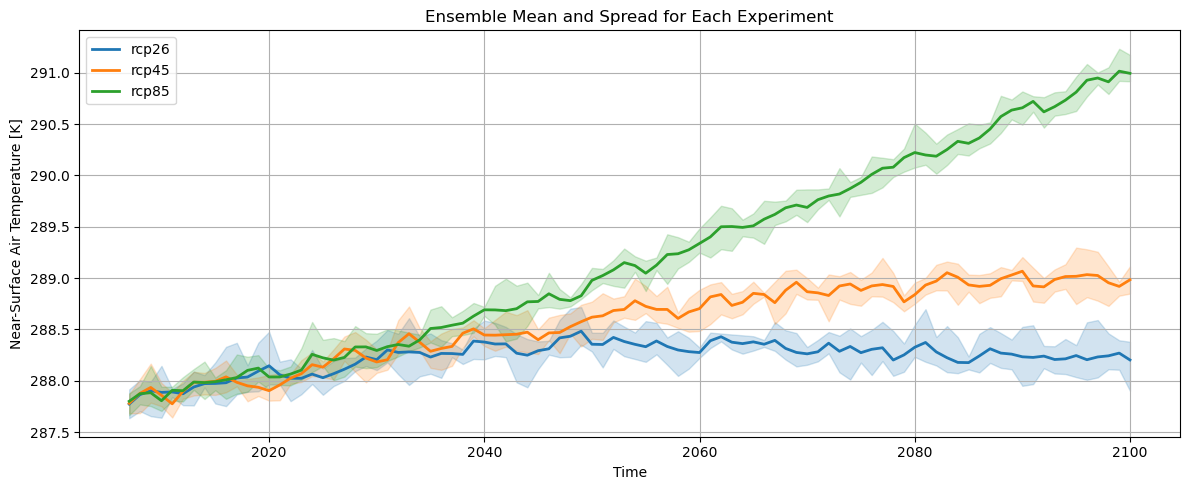

In [ ]:
import matplotlib.pyplot as plt

# Create a color cycle for different experiments
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

plt.figure(figsize=(12, 5))

for i, exp in enumerate(data.experiment.values):
    ts = data.sel(experiment=exp).resample(time="1YE").mean()
    ts_min = ts.min(dim="ensemble").squeeze()
    ts_max = ts.max(dim="ensemble").squeeze()
    ts_mean = ts.mean(dim="ensemble").squeeze()
    # Plot min–max shading
    plt.fill_between(
        ts.time,
        ts_min,
        ts_max,
        color=colors[i % len(colors)],
        alpha=0.2,
        label=None,
    )
    # Plot mean line
    plt.plot(
        ts.time,
        ts_mean,
        color=colors[i % len(colors)],
        linewidth=2,
        label=f"{exp}"
    )

# Add plot decorations
plt.title("Ensemble Mean and Spread for Each Experiment")
plt.xlabel("Time")
plt.ylabel(f"{data.attrs['long_name']} [{data.attrs['units']}]")  # Replace with actual units
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #3498db 0%, #2980b9 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #3498db; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">1</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Search <span style="font-size: 0.6em; font-weight: normal;">(Findablity)</span></h1>
        </div>
    </div>
</div>

### Find data via STAC Browser

<img src="https://cdnjs.cloudflare.com/ajax/libs/bootstrap-icons/1.13.1/icons/globe.svg" width="40" style="display: block; margin: 0; text-align: left;">

<video style="text-align: left; display: block;" width="800" controls>
  <source src="media/stac-browser_q.mp4" type="video/mp4">
</video>

<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #e74c3c 0%, #c0392b 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #e74c3c; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">2</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Cataloging Data <span style="font-size: 0.6em; font-weight: normal;">(Reusablity)</span></h1>
        </div>
    </div>
</div>

### Download the Intake catalogue 

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/bash/bash-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [ ]:
$ freva-client databrowser intake-catalogue  --host www.gems.dkrz.de --flavour cmip6 \
mip_era=mpi-ge frequency=mon variable_id=tas --time "2025-01 to 2100-12" \
experiment_id=!picontrol

In [126]:
cmd("databrowser intake-catalogue  --host www.gems.dkrz.de --flavour cmip6 mip_era=mpi-ge frequency=mon variable_id=pr variable_id=tas --time '2025-01 to 2100-12' experiment_id=!picontrol", limit=5)

{
   "esmcat_version": "0.1.0",
   "attributes": [
      {
         "column_name": "mip_era",


<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #e74c3c 0%, #c0392b 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #e74c3c; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">2</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Cataloging Data <span style="font-size: 0.6em; font-weight: normal;">(Reusablity)</span></h1>
        </div>
    </div>
</div>

### Download the Intake catalogue 

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/python/python-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [125]:

db.intake_catalogue()

,unique
file,600
project,1
product,1
institute,1
model,1
experiment,3
time_frequency,1
realm,2
variable,1
ensemble,100


<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #e74c3c 0%, #c0392b 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #e74c3c; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">2</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Cataloging Data <span style="font-size: 0.6em; font-weight: normal;">(Reusablity)</span></h1>
        </div>
    </div>
</div>

### Download the STAC STATIC catalogue 

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/bash/bash-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [ ]:
$ freva-client databrowser stac-catalogue --host www.gems.dkrz.de --flavour cmip6 \
mip_era=mpi-ge frequency=mon variable_id=tas --time "2025-01 to 2100-12" \
experiment_id=!picontrol

In [127]:
cmd("databrowser stac-catalogue --host www.gems.dkrz.de --flavour cmip6 mip_era=mpi-ge frequency=mon variable_id=pr variable_id=tas --time '2025-01 to 2100-12' experiment_id=!picontrol")

STAC catalog saved to: /Users/mo/dev/20250801/Talks/talks/DataSearchWorkshop2025/stac-catalog-Dataset-cmip6-20b84af9-730-file.zip (size: 2.29 MB). Or simply download from: https://www.gems.dkrz.de/api/freva-nextgen/databrowser/stac-catalogue/cmip6/file?multi-version=False&mip_era=mpi-ge&frequency=mon&variable_id=pr&variable_id=tas&experiment_id=%21picontrol&time=2025-01+to+2100-12&time_select=flexible



<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #e74c3c 0%, #c0392b 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #e74c3c; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">2</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Cataloging Data <span style="font-size: 0.6em; font-weight: normal;">(Reusablity)</span></h1>
        </div>
    </div>
</div>

### Download the STAC STATIC catalogue 

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/python/python-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [128]:
db.stac_catalogue()

Downloading the STAC catalog started ...

'STAC catalog saved to: /Users/mo/dev/20250801/Talks/talks/DataSearchWorkshop2025/stac-catalog-Dataset-cmip6-fef17806-907-file.zip (size: 1.14 MB). Or simply download from: https://www.gems.dkrz.de/api/freva-nextgen/databrowser/stac-catalogue/cmip6/file?multi-version=False&mip_era=mpi-ge&variable_id=tas&frequency=mon&experiment_id=%21picontrol&time=2025-01+to+2100-12&time_select=flexible'

<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #e74c3c 0%, #c0392b 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #e74c3c; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">2</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Cataloging Data <span style="font-size: 0.6em; font-weight: normal;">(Reusablity)</span></h1>
        </div>
    </div>
</div>

<img src="https://cdnjs.cloudflare.com/ajax/libs/bootstrap-icons/1.13.1/icons/globe.svg" width="40" style="display: block; margin: 0; text-align: left;">

<video style="text-align: left; display: block;" width="800" controls>
  <source src="media/download_catalogue_q.mp4" type="video/mp4">
</video>

<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #f39c12 0%, #e67e22 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #f39c12; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">3</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Access <span style="font-size: 0.6em; font-weight: normal;">(Accessiblity)</span></h1>
        </div>
    </div>
</div>

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/python/python-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [24]:
from freva_client import authenticate
import xarray as xr
token = authenticate(host="www.gems.dkrz.de", token_file="~/token.json")
data = databrowser(host="www.gems.dkrz.de", flavour="cmip6",
                   mip_era="mpi-ge",
                   variable_id="tas",
                   experiment_id="historical",
                   stream_zarr=True)
uri = list(data)[0]
uri

'https://www.nextgems.dkrz.de/api/freva-nextgen/data-portal/zarr/5b8ec334-d2c9-536d-9b8e-249bbd34ac23.zarr'

In [26]:
ds = xr.open_dataset(
    uri,
    engine="zarr", 
    storage_options={
        "headers":{"Authorization": f"Bearer {token['access_token']}"}
   })
ds

<xarray.Dataset> Size: 138MB
Dimensions:  (time: 1872, lat: 96, lon: 192)
Coordinates:
  * time     (time) datetime64[ns] 15kB NaT NaT NaT NaT NaT ... NaT NaT NaT NaT
  * lon      (lon) float64 2kB nan nan nan nan nan nan ... nan nan nan nan nan
  * lat      (lat) float64 768B nan nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tas      (time, lat, lon) float32 138MB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.5 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Thu Dec 13 08:45:54 2018: cdo -f nc -r setpartabn,tas.parta...
    institution:  Max-Planck-Institute for Meteorology
    CDO:          Climate Data Operators version 1.9.5 (http://mpimet.mpg.de/...

<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #f39c12 0%, #e67e22 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #f39c12; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">3</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Access <span style="font-size: 0.6em; font-weight: normal;">(Accessiblity)</span></h1>
        </div>
    </div>
</div>

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/bash/bash-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [ ]:
$ freva-client databrowser data-search --host www.gems.dkrz.de \
--flavour cmip6 mip_era=mpi-ge \
experiment_id=historical variable_id=tas --zarr

In [64]:

cmd("databrowser data-search --host www.gems.dkrz.de --flavour cmip6 mip_era=mpi-ge experiment_id=historical variable_id=tas --zarr", limit=1)

https://www.nextgems.dkrz.de/api/freva-nextgen/data-portal/zarr/5b8ec334-d2c9-536d-9b8e-249bbd34ac23.zarr


In [105]:
!curl -s -H "Authorization: Bearer {token['access_token']}" \
      -O {uri}/.zmetadata
!/run/current-system/sw/bin/jq -r '.metadata | keys[] | select(test("/.zarray$")) | gsub("/\\.zarray$"; "")' .zmetadata


lat
lon
tas
time


<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #f39c12 0%, #e67e22 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #f39c12; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">3</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Access <span style="font-size: 0.6em; font-weight: normal;">(Accessiblity)</span></h1>
        </div>
    </div>
</div>

<img src="https://cdnjs.cloudflare.com/ajax/libs/bootstrap-icons/1.13.1/icons/globe.svg" width="40" style="display: block; margin: 0; text-align: left;">

<video style="text-align: left; display: block;" width="800" controls>
  <source src="media/access_metadata_final_q.mp4" type="video/mp4">
</video>

<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #27ae60 0%, #229954 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #27ae60; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">4</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Customize Dataset <span style="font-size: 0.6em; font-weight: normal;">(Interoperablity)</span></h1>
        </div>
    </div>
</div>

### Generate a dummy SST data

In [58]:
import numpy as np, xarray as xr
from getpass import getuser
time = np.arange("2025-01","2026-01",dtype="datetime64[M]")
lat, lon = np.linspace(-30,30,121), np.linspace(120,290,171)
da = (xr.DataArray(28 - 0.006*(lon-230), dims=("lon",), coords={"lon":lon})
      .expand_dims(time=time, lat=lat))
da.name = "sst"; da.attrs.update(long_name="Idealized Pacific SST", units="°C")
da.to_netcdf(f"dummy_sst_{getuser()}.nc")
print(f"check if dummy_sst_{getuser()}.nc exists: {os.path.exists(f'dummy_sst_{getuser()}.nc')}")


check if dummy_sst_mo.nc exists: True


<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #27ae60 0%, #229954 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #27ae60; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">4</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Customize Dataset <span style="font-size: 0.6em; font-weight: normal;">(Interoperablity)</span></h1>
        </div>
    </div>
</div>

### Plot the dummy SST data

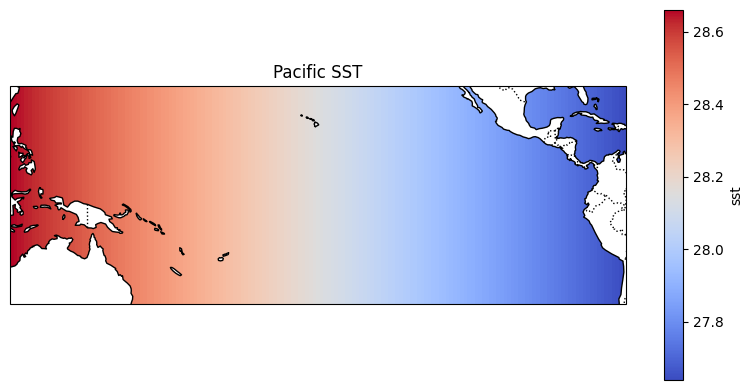

In [34]:
import matplotlib.pyplot as plt, cartopy.crs as ccrs, cartopy.feature as cfeature

fig, ax = plt.subplots(figsize=(8,4), subplot_kw=dict(projection=ccrs.PlateCarree(180)))
da.mean("time").plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap="coolwarm", add_colorbar=True)

ax.add_feature(cfeature.LAND, facecolor="white", zorder=2); ax.coastlines(zorder=3); ax.add_feature(cfeature.BORDERS, linestyle=":", zorder=3)
plt.title("Pacific SST"); plt.tight_layout(); plt.show()

<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #27ae60 0%, #229954 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #27ae60; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">4</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Customize Dataset <span style="font-size: 0.6em; font-weight: normal;">(Interoperablity)</span></h1>
        </div>
    </div>
</div>

### Add/Remove the dummy SST data to/from Freva

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/python/python-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [59]:
global_attributes = {"project": "userdata", "product": "stats", "model": "IFS", "experiment": "ETCCDI", "realm": "atmos"}
databrowser.userdata(
    action="add",
    userdata_items=[f"{os.getcwd()}/dummy_sst_{getuser()}.nc"],
    metadata=global_attributes,
    host="https://www.gems.dkrz.de",
)

1 have been successfully added to the databrowser. 0 files were duplicates and not added.

In [60]:
global_attributes = {"project": "userdata", "product": "stats", "model": "IFS", "experiment": "ETCCDI", "realm": "atmos"}
databrowser.userdata(
    action="delete",
    metadata=global_attributes,
    host="https://www.gems.dkrz.de",
)

User data deleted successfully

<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #27ae60 0%, #229954 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #27ae60; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">4</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Customize Dataset <span style="font-size: 0.6em; font-weight: normal;">(Interoperablity)</span></h1>
        </div>
    </div>
</div>

### Add/Remove the dummy SST data to/from Freva

<img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/bash/bash-original.svg" width="40" style="display: block; margin: 0; text-align: left;">

In [68]:
print(f"$ freva-client databrowser user-data add --path dummy_sst_{getuser()}.nc --facet project=userdata --facet product=stats --facet model=IFS --facet experiment=ETCCDI --facet realm=atmos --host https://www.gems.dkrz.de")
print()
cmd(f"databrowser user-data add --path {os.getcwd()}/dummy_sst_{getuser()}.nc --facet project=userdata --facet product=stats --facet model=IFS --facet experiment=ETCCDI --facet realm=atmos --host https://www.gems.dkrz.de")

$ freva-client databrowser user-data add --path dummy_sst_mo.nc --facet project=userdata --facet product=stats --facet model=IFS --facet experiment=ETCCDI --facet realm=atmos --host https://www.gems.dkrz.de



1 have been successfully added to the databrowser. 0 files were duplicates and 
not added.



In [67]:
print("$ freva-client databrowser user-data delete --search-key project=userdata --search-key product=stats --search-key model=IFS --search-key experiment=ETCCDI --search-key realm=atmos --host https://www.gems.dkrz.de")
print()
cmd(f"databrowser user-data delete --search-key project=userdata --search-key product=stats --search-key model=IFS --search-key experiment=ETCCDI --search-key realm=atmos --host https://www.gems.dkrz.de")

$ freva-client databrowser user-data delete --search-key project=userdata --search-key product=stats --search-key model=IFS --search-key experiment=ETCCDI --search-key realm=atmos --host https://www.gems.dkrz.de



User data deleted successfully



<div style="padding: 10px; font-family: Arial, sans-serif; background: linear-gradient(135deg, #27ae60 0%, #229954 100%); border-radius: 12px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center; gap: 20px;">
        <div style="background: white; color: #27ae60; width: 60px; height: 60px; border-radius: 50%; display: flex; align-items: center; justify-content: center; font-weight: bold; font-size: 2em; box-shadow: 0 3px 8px rgba(0,0,0,0.2); flex-shrink: 0;">4</div>
        <div style="color: white; text-align: left; flex: 1;">
            <h1 style="margin: 0; font-size: 2.5em; font-weight: bold; text-align: left;">Customize Dataset <span style="font-size: 0.6em; font-weight: normal;">(Interoperablity)</span></h1>
        </div>
    </div>
</div>

<img src="https://cdnjs.cloudflare.com/ajax/libs/bootstrap-icons/1.13.1/icons/globe.svg" width="40" style="display: block; margin: 0; text-align: left;">

<video style="text-align: left; display: block;" width="800" controls>
  <source src="media/user_data_q.mp4" type="video/mp4">
</video>

<div style="padding: 40px; font-family: Arial, sans-serif; text-align: center;">
    <div style="max-width: 800px; margin: 0 auto;">
        <h1 style="color: #2c3e50; font-size: 3.5em; font-weight: bold; margin-bottom: 20px;">After this walkthrough, we believe FREVA is FAIR enough!</h1>
        <div style="display: flex; justify-content: center; gap: 30px; margin: 40px 0; flex-wrap: wrap;">
            <div style="background: #3498db; color: white; padding: 15px 25px; border-radius: 25px; font-weight: bold; font-size: 1.1em;">Findable</div>
            <div style="background: #e74c3c; color: white; padding: 15px 25px; border-radius: 25px; font-weight: bold; font-size: 1.1em;">Accessible</div>
            <div style="background: #f39c12; color: white; padding: 15px 25px; border-radius: 25px; font-weight: bold; font-size: 1.1em;">Interoperable</div>
            <div style="background: #27ae60; color: white; padding: 15px 25px; border-radius: 25px; font-weight: bold; font-size: 1.1em;">Reusable</div>
        </div>
        <p style="color: #7f8c8d; font-size: 1.4em; margin-bottom: 40px; line-height: 1.5;">What do you think?</p>
    </div>
    <p style="color: #7f8c8d; font-size: 1.4em; margin-bottom: 40px; line-height: 1.5;">Thanks for your attention</p>
</div>

## Hands On Session:

- Databrowser bread & butter (Mo)
- How to Auth (Mo)
- Add your own data (Mo)
- The S3 cloud store (Manuel)
- Access data on S3 (Manuel)
- FrevaGPT (Martin)

# File vs Object Storage


## File Storage

- Hierarchical structure (tree)
  - Directory with files and other directories
- Easy to rename and move items around
  - **Not** identified by name
  - Change references
- _System-centric_, not designed to be share


## Object Storage

- Flat structure (key-value)
  - Items are identified by a key/name
  - Content is accessed providing key/name
- Not easy to move items around!
  - Moving is renaming 
  - Modify key

## **Local** vs Remote Storage

**Local** storage should be:

 - Fast
 - Reliable
 - Performant!


## Local vs **Remote** Storage

**Remote** storage should be:

 - Simple & common language
 - Permissive
 - Highly available!


## HTTP aka internet language!?

Stands for _Hypertext Transfer Protocol_. 
There are many protocols...



- simple
- very generic
- very flexible
- famous!



Client makes a **request**, server **replies**

> **_NOTE:_** IP the actual and literal Internel Protocol

## Requests

 - Method - _verb_/type (`GET`, [etc...](https://developer.mozilla.org/en-US/docs/Web/HTTP/Reference/Methods))
 - Headers - metadata, options (`Content-Type`,...)
 - Body - data (empty, raw bytes, text,... )

## Replies

 - Code + Result (`404 Not Found`)
 - Headers - metadata, options (`Content-Type`,...)
 - Body - data (empty, raw bytes, text,... )


## Object Store APIs

Different providers expose API not be (**fully**) interchangable. E.g.  `list objects`:

- [AWS S3](https://docs.aws.amazon.com/AmazonS3/latest/API/API_Operations_Amazon_Simple_Storage_Service.html)
```
GET /?delimiter={delimiter}&encoding-type={enctype}&marker=....&prefix={prefix}
```
- [Openstack Swift](https://docs.openstack.org/api-ref/object-store/)
```
GET /v1/{account}/{container}
```
- [Google Cloud Storage](https://cloud.google.com/storage/docs/json_api/v1/objects/get)
```
GET /v1/b/{bucket}/o/
```
- [Azure Blob Storage](https://myaccount.blob.core.windows.net/mycontainer/myblob)
```
GET /{container}?restype=container&comp=list
```

# S3 - Simple Storage Service

Created by AWS
- S3 API is public (partially)

## S3 Concepts

- Bucket - The container of the objects
- Objects - The actual data
- Regions (advanced) - Location of the data
- Authentication

> Directories can be emulated by empty objects terminated with `/`

## S3 - Authentication

- A bucket may not be publicly available.
- Key-Secret pairs sign the request
  - May expire automatically
  - May be valid indefinetly
- Create temporarly link to share or receive data

## Exploring data on S3

- Command line interfaces (CLIs)
- Software Development Kits (SDKs)
  - Libraries

## CLIs

AWS provides a command line interface (not just for `s3`)

In [ ]:
#micromamba install awscli ||pip install awscli
aws s3 ls s3://ncar-cesm2-lens/ --no-sign-request

alias awss3='aws s3 --no-sign-request'
awss3 cp --recursive  s3://ncar-cesm2-lens/atm/static/grid.zarr /tmp/grid.zarr

> Appending `/` to the S3 resource may produce different results

## MINIO

[Minio](https://docs.min.io/community/minio-object-store/index.html) - Open source S3 object store

In [ ]:
module load minio-client
mc alias set aws https://s3.amazonaws.com "" "" # empty keys = no authentication
mc ls aws/ncar-cesm2-lens/ice/static/grid.zarr

mc alias set dkrz https://s3.eu-dkrz-1.dkrz.cloud "" "" 
mc ls dkrz/freva

> Appending `/` may produce different results

## Useful Python modules

- [`boto3`](https://boto3.amazonaws.com/v1/documentation/api/latest/index.html) - AWS S3 official sdk for python
  - [`aioboto3`](https://github.com/terricain/aioboto3)
- [`obstore`](https://developmentseed.org/obstore/latest/api/store/#obstore.store.from_url) - Alse supports non S3 object stores
- [`fsspec`](https://github.com/fsspec)/[`s3fs`](https://github.com/fsspec/s3fs) - Filesystem wrapper for storage types
- [`minio`](https://min.io/docs/minio/linux/developers/python/minio-py.html) - Minio SDK for python

## The usual suspects

In [ ]:
dataset_url = 's3://ncar-cesm2-lens/ocn/static/grid.zarr'
s3_opts = {'anon': True}

In [ ]:
import xarray as xr
ds = xr.open_dataset(dataset_url, engine='zarr', storage_options=s3_opts)

In [ ]:
import zarr
zarr.open(dataset_url, storage_options=s3_opts)

## NetCDF on S3 (classic, nc4/hdf5)

In [ ]:
import s3fs
s3 = s3fs.S3FileSystem(endpoint_url="https://s3.eu-dkrz-1.dkrz.cloud", anon=True)
with s3.open('s3://freva/workshop/tas.nc') as f:
    ds = xr.open_dataset(f)

In Levante custom builds of `libnetcdf` and `cdo` can work with data on S3
> Very unstable!!!

```
/fastdata/k20200/k202186/public/bin/ncdump  -h https://s3.eu-dkrz-1.dkrz.cloud/freva/workshop/tas.nc#mode=s3,bytes
/fastdata/k20200/k202186/public/bin/cdo  sinfo https://s3.eu-dkrz-1.dkrz.cloud/freva/workshop/tas.nc#mode=s3,bytes
```